# Data import 


In [3]:
import pandas as pd
student_data_unpr = pd.read_excel("subset_studium_german.xlsx")
student_data_unpr = student_data_unpr[student_data_unpr["Studium_Label"].notnull()]
student_data_unpr = student_data_unpr.drop("Unnamed: 0", axis=1)
student_data_unpr = student_data_unpr.drop("Studium_Comment", axis=1)
student_data = student_data_unpr
student_data = student_data.drop("Studium_Label", axis=1)



student_data = student_data.drop(student_data.index[103:], axis=0)
student_data_unpr = student_data_unpr.drop(student_data_unpr.index[103:], axis=0)

anzahl_zeilen = student_data.shape[0]
print("Anzahl der Zeilen:", anzahl_zeilen)

print(len(student_data[student_data["Studium"].notnull()]))
student_data.head(10)

FileNotFoundError: [Errno 2] No such file or directory: 'subset_studium_german.xlsx'

# OpenAI GPT3.5 application

In [2]:
from openai import OpenAI
client = OpenAI()



In [3]:
for index, eintrag in student_data.iterrows():
    for inhalt in eintrag:
        user_input = inhalt
    

In [4]:
initial_message = {"role": "user", "content": "You are my sentiment assistant. I want you to analyze my text and categorize it into the three sentiments: positive, neutral, negative. Only response with either positive, neutral or negative"}

results=[]
results_df = []

for index, eintrag in student_data.iterrows():
    for inhalt in eintrag:
        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[
                initial_message,
                {"role": "user", "content": inhalt}
            ],
            temperature=0,
        )
        
        # Speichere den Index und die Antwort für jeden Eintrag in der Ergebnisliste
        results.append({"index": index, "sentimentPrediction": response.choices[0].message.content})

# Konvertiere die Ergebnisliste in einen DataFrame
results_df = pd.DataFrame(results)




In [5]:
display(results_df)

,index,sentimentPrediction
0,0,neutral
1,1,positive
2,2,neutral
3,3,positive
4,4,positive
...,...,...
98,98,positive
99,99,neutral
100,100,positive
101,101,neutral


# Evaluation

In [47]:
#results_df = results_df.drop("index", axis=1)
student_data = pd.concat([student_data_unpr, results_df], axis=1)
#display(student_data)


student_data[x] = student_data[x].astype(str)
    

display(student_data.shape[0])

unique_classes = student_data['Studium_Label'].unique()
target_names = list(unique_classes)
display(target_names)
display(student_data.iloc[-1].values)
student_data = student_data.drop(student_data.index[-1])
student_data = student_data.drop(student_data.index[-1])

display(student_data.shape[0])

104

['neutral', 'positive', 'negative', nan]

array([nan, nan, 'neutral'], dtype=object)

102

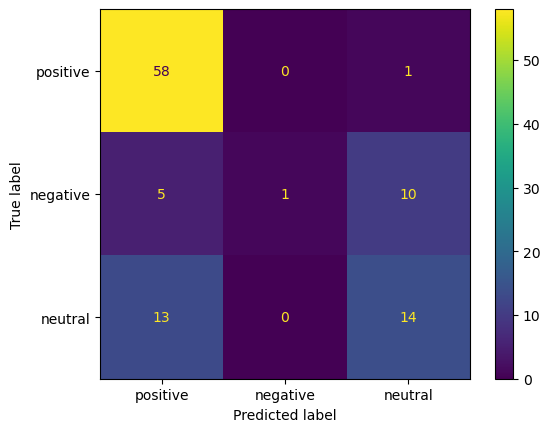

0.7156862745098039
              precision    recall  f1-score   support

    positive       1.00      0.06      0.12        16
    negative       0.56      0.52      0.54        27
     neutral       0.76      0.98      0.86        59

    accuracy                           0.72       102
   macro avg       0.77      0.52      0.51       102
weighted avg       0.75      0.72      0.66       102



In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report
import matplotlib.pyplot as plt
confusion_mat = confusion_matrix(student_data['Studium_Label'], student_data['sentimentPrediction'], labels=['positive', 'negative', 'neutral'])

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=['positive', 'negative', 'neutral'])
disp.plot()
plt.show()
print(f1_score(student_data['Studium_Label'], student_data['sentimentPrediction'], labels=['positive', 'negative', 'neutral'], average='micro'))
print(classification_report(
    student_data['Studium_Label'],
    student_data['sentimentPrediction'],
    output_dict=False,
    target_names=['positive', 'negative', 'neutral']
))